In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

## Načítanie CSV súborov

In [75]:
con = pd.read_csv("dataset82/connections.csv", sep='\t')
proc = pd.read_csv("dataset82/processes.csv", sep='\t')
dev = pd.read_csv("dataset82/devices.csv", sep='\t')
prof = pd.read_csv("dataset82/profiles.csv", sep='\t')

#
# 1.1 Základný opis dát spolu s ich charakteristikami

## A) Analýza štruktúr dát ako súbory, záznamy.

### Prvý pohľad na dáta.

#### Connections

In [76]:
con.head()

ts                 imei  mwra  c.dogalize  \
0  2018-05-05 10:00:00   359043379931766007   1.0     8.77752   
1  2018-05-05 10:01:00  3590433799317662089   0.0    14.22336   
2  2018-05-05 10:02:00   863033069630348974   1.0     8.54406   
3  2018-05-05 10:03:00  8630330696303482303   0.0     8.45038   
4  2018-05-05 10:04:00  3590433799317661214   1.0     8.43303   

   c.android.chrome  c.katana  c.android.gm  c.android.youtube  \
0          11.38049  12.34407       9.92776            5.45121   
1          10.57120  11.62779      12.58529           10.95140   
2          10.56842  11.75027       7.99912           13.79062   
3          12.20856  12.93420       8.91733           13.61598   
4          12.91601   6.59161      13.28375           11.84398   

   c.android.vending  c.updateassist  c.UCMobile.x86  c.UCMobile.intl  \
0           38.91961         0.00350         3.07943         64.98245   
1           59.10202         0.00018        86.13880         68.26242   
2           67.85473         0.15281        89.57752         11.52702   
3           57.52227         0.09174        77.12259         83.83905   
4           61.12345         0.00431        77.10114         53.79920   

   c.raider  
0   1.40681  
1  45.71979  
2  94.70739  
3  37.76103  
4  35.20326

In [77]:
proc.head()

ts                 imei  mwra  p.android.packageinstaller  \
0  2018-05-05 10:00:00   359043379931766007   1.0                    11.90416   
1  2018-05-05 10:01:00  3590433799317662089   0.0                     8.74523   
2  2018-05-05 10:02:00   863033069630348974   1.0                    15.68790   
3  2018-05-05 10:03:00  8630330696303482303   0.0                    15.17766   
4  2018-05-05 10:04:00  3590433799317661214   1.0                    12.11010   

   p.android.externalstorage  p.system  p.android.chrome  p.android.settings  \
0                   11.19779   7.60383           9.18353             8.55184   
1                    7.65554   9.49404           8.20213             6.32215   
2                   11.98031  12.67268          11.29634            11.47538   
3                    3.39842  10.01515           5.53874             3.57674   
4                    6.01721   7.15878          15.25489            13.88784   

   p.android.documentsui  p.android.gm  p.katana  p.google  p.android.gms  \
0               11.19148       8.30220  71.02059  35.24565       52.07074   
1               12.33170      11.65786  49.94224  33.98371       40.80957   
2               10.38642       9.07927  40.91094  36.75758       45.25943   
3                9.83642      13.01602  43.79368  24.11398       34.80335   
4                7.34559       7.38960  45.92319  40.94376       53.10769   

   p.inputmethod.latin  p.process.gapps  p.olauncher  p.browser.provider  \
0             66.53657         22.62795     68.82046             5.34638   
1             46.12881          1.75228     63.95436            92.52467   
2             58.32725         26.62538     59.50626            25.68333   
3             63.78355         95.12515     36.75006            82.01474   
4             48.84318         65.04820     50.38813             0.89319   

   p.notifier  p.gms.persistent  p.android.defcontainer  p.android.vending  \
0    60.71954          91.44208                32.74843           72.98707   
1     3.56652          54.81245                47.19235           34.25583   
2    95.57546          70.33923                 9.74088           51.66399   
3    30.62274          81.77126                27.99291           33.84844   
4    56.53053          71.65832                19.58884           98.09707   

   p.simulator  p.dogalize  
0     91.50713    38.12265  
1     64.09818    74.40462  
2      6.16361    79.52068  
3     16.02638    53.70138  
4     93.80860    27.96079

In [78]:
dev.head()

latitude  longitude  store_name code            location  \
0  52.71083    5.74861   Emmeloord   NL    Europe/Amsterdam   
1  58.04254   65.27258       Tavda   RU  Asia/Yekaterinburg   
2  50.75932   25.34244       Lutsk   UA         Europe/Kyiv   
3  61.72744   17.10558  Hudiksvall   SE    Europe/Stockholm   
4   6.03333   37.55000  Arba Minch   ET  Africa/Addis_Ababa   

                  imei  
0  8630330696303481982  
1   863033069630348024  
2   863033069630348503  
3  8630330696303481750  
4   863033069630348081

In [79]:
prof.head()

job  \
0                          NaN   
1                          NaN   
2                          NaN   
3  Engineer, building services   
4                          NaN   

                                   current_location                 imei  \
0      (Decimal('5.7948455'), Decimal('32.423690'))  8630330696303481628   
1     (Decimal('-31.286773'), Decimal('71.138696'))   863033069630348024   
2   (Decimal('53.8732785'), Decimal('-158.482758'))  3590433799317662469   
3    (Decimal('-44.6071825'), Decimal('68.606055'))  8630330696303481388   
4  (Decimal('-19.3991525'), Decimal('-142.727922'))  3590433799317661917   

   user_id                                            address          ssn  \
0     1984   33086 Matthew Glens\r\nEast Dennisport, VI 88422  249-12-0967   
1     1404  766 Barnes Heights Suite 236\r\nMariafurt, OR ...  255-55-3436   
2     1645                                                NaN  578-31-7405   
3      854          1088 Weaver Prairie\r\nPriceton, MN 17706  079-83-9171   
4     1803       81692 Park Greens\r\nHernandezstad, WV 32899  624-99-9580   

                       company   birthdate          registration  \
0               Gilbert-Wright  1946-02-05            2019/11/22   
1  Francis, Nichols and Mendez  2005-03-16            2024-08-19   
2   Combs, Sanchez and Calhoun         NaN            2021/10/03   
3       Cole, Moore and Grimes  1993-09-29  07/31/2024, 00:00:00   
4         Villarreal-Middleton         NaN  05/16/2021, 00:00:00   

                         mail     username           name  
0           sarah28@yahoo.com       ehorne  Alicia Norman  
1      grahamjoshua@yahoo.com        hking  Samuel Fields  
2         belllaura@yahoo.com  morganchase   Thomas Lloyd  
3  shieldsrichard@hotmail.com      david66   Edward Brown  
4           jason79@yahoo.com      scott17    Joseph Hart

### Zobrazenie základných informácií o jednotlivých dátach.

In [80]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15163 entries, 0 to 15162
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15163 non-null  object 
 1   imei               15163 non-null  int64  
 2   mwra               15163 non-null  float64
 3   c.dogalize         15163 non-null  float64
 4   c.android.chrome   15163 non-null  float64
 5   c.katana           15163 non-null  float64
 6   c.android.gm       15163 non-null  float64
 7   c.android.youtube  15163 non-null  float64
 8   c.android.vending  15163 non-null  float64
 9   c.updateassist     15163 non-null  float64
 10  c.UCMobile.x86     15163 non-null  float64
 11  c.UCMobile.intl    15163 non-null  float64
 12  c.raider           15163 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


In [81]:
proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15163 entries, 0 to 15162
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15163 non-null  object 
 1   imei                        15163 non-null  int64  
 2   mwra                        15163 non-null  float64
 3   p.android.packageinstaller  15163 non-null  float64
 4   p.android.externalstorage   15163 non-null  float64
 5   p.system                    15163 non-null  float64
 6   p.android.chrome            15163 non-null  float64
 7   p.android.settings          15163 non-null  float64
 8   p.android.documentsui       15163 non-null  float64
 9   p.android.gm                15163 non-null  float64
 10  p.katana                    15163 non-null  float64
 11  p.google                    15163 non-null  float64
 12  p.android.gms               15163 non-null  float64
 13  p.inputmethod.latin         151

In [82]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2983 non-null   float64
 1   longitude   2983 non-null   float64
 2   store_name  2983 non-null   object 
 3   code        2982 non-null   object 
 4   location    2983 non-null   object 
 5   imei        2983 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 140.0+ KB


In [83]:
prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job               755 non-null    object
 1   current_location  2391 non-null   object
 2   imei              2517 non-null   int64 
 3   user_id           2517 non-null   int64 
 4   address           2139 non-null   object
 5   ssn               2517 non-null   object
 6   company           2517 non-null   object
 7   birthdate         1384 non-null   object
 8   registration      2517 non-null   object
 9   mail              2517 non-null   object
 10  username          2517 non-null   object
 11  name              2517 non-null   object
dtypes: int64(2), object(10)
memory usage: 236.1+ KB


In [84]:
# .dtypes
# .columns
# .shape

### Základné hodnoty o jednotlivých dátach

In [85]:
con.describe()

imei          mwra    c.dogalize  c.android.chrome  \
count  1.516300e+04  15163.000000  15163.000000      15163.000000   
mean   3.892932e+18      0.626921     10.020399         12.363111   
std    3.336523e+18      0.483639      2.577396          2.055817   
min    3.590434e+17      0.000000      1.345990          4.153610   
25%    8.630331e+17      0.000000      8.153405         10.974450   
50%    3.590434e+18      1.000000      9.850370         12.365670   
75%    8.630331e+18      1.000000     11.809825         13.717980   
max    8.630331e+18      1.000000     19.978530         21.682460   

           c.katana  c.android.gm  c.android.youtube  c.android.vending  \
count  15163.000000  15163.000000       15163.000000       15163.000000   
mean      11.203841     10.586978          10.578701          55.679084   
std        2.435685      2.644261           2.677256          11.656833   
min        3.114230      0.352680           1.671620           0.000000   
25%        9.417735      8.643630           8.607805          47.750190   
50%       11.426240     10.677230          10.508120          55.798700   
75%       12.933545     12.504850          12.479840          63.562805   
max       19.779240     19.863010          21.060030         100.000000   

       c.updateassist  c.UCMobile.x86  c.UCMobile.intl      c.raider  
count    15163.000000    15163.000000     15163.000000  15163.000000  
mean         0.061172       49.468377        50.209351     49.716589  
std          0.961518       28.945043        28.820032     28.675626  
min          0.000000        0.000000         0.000000      0.000000  
25%          0.000240       24.499375        25.180615     25.364990  
50%          0.001440       49.233960        49.965320     49.800630  
75%          0.011635       74.723625        75.216710     74.027650  
max        100.000000      100.000000       100.000000    100.000000

In [86]:
proc.describe()

imei          mwra  p.android.packageinstaller  \
count  1.516300e+04  15163.000000                15163.000000   
mean   3.892932e+18      0.626921                   11.124513   
std    3.336523e+18      0.483639                    2.740620   
min    3.590434e+17      0.000000                    1.251080   
25%    8.630331e+17      0.000000                    9.098235   
50%    3.590434e+18      1.000000                   11.002760   
75%    8.630331e+18      1.000000                   13.110320   
max    8.630331e+18      1.000000                   22.171880   

       p.android.externalstorage      p.system  p.android.chrome  \
count               15163.000000  15163.000000      15163.000000   
mean                    9.400444      9.949135         11.757776   
std                     2.327835      2.606072          2.306645   
min                     1.339600      1.830330          0.000000   
25%                     7.839450      8.083575         10.351225   
50%                     9.178270      9.775220         11.966780   
75%                    10.784935     11.735265         13.356430   
max                    18.809410     19.326580         20.313310   

       p.android.settings  p.android.documentsui  p.android.gm      p.katana  \
count        15163.000000           15163.000000  15163.000000  15163.000000   
mean             9.947951              10.022634     11.223905     48.104858   
std              2.483041               2.626337      2.650640     11.355806   
min              1.191610               1.098620      1.396170      0.000000   
25%              8.144540               8.113970      9.322810     40.499285   
50%              9.887110               9.974390     11.330850     48.169930   
75%             11.839975              11.931550     13.120465     55.766665   
max             18.379140              18.743220     20.901430    100.000000   

           p.google  p.android.gms  p.inputmethod.latin  p.process.gapps  \
count  15163.000000   15163.000000         15163.000000     15163.000000   
mean      48.549863      41.101323            49.804109        50.048830   
std       13.111572      11.697728            13.162197        28.810411   
min        0.000000       0.000000             0.000000         0.000000   
25%       39.766690      33.253660            40.947510        25.036740   
50%       48.600220      41.158090            49.937270        50.427940   
75%       57.283590      48.953810            58.561030        74.992555   
max      100.000000     100.000000           100.000000       100.000000   

        p.olauncher  p.browser.provider    p.notifier  p.gms.persistent  \
count  15163.000000        15163.000000  15163.000000      15163.000000   
mean      49.676033           49.675546     49.985871         50.311704   
std       28.977865           28.911641     28.951370         28.789519   
min        0.000000            0.000000      0.000000          0.000000   
25%       24.706795           24.420080     24.875380         25.672740   
50%       49.269450           49.602170     50.326420         50.524260   
75%       74.852160           74.769130     74.893240         75.259580   
max      100.000000          100.000000    100.000000        100.000000   

       p.android.defcontainer  p.android.vending   p.simulator    p.dogalize  
count            15163.000000       15163.000000  15163.000000  15163.000000  
mean                49.880545          49.782449     49.603290     49.822385  
std                 29.020476          28.955003     29.058630     28.855728  
min                  0.000000           0.000000      0.000000      0.000000  
25%                 24.627315          24.484425     24.198045     24.769985  
50%                 49.969820          49.451970     50.049100     49.511650  
75%                 75.365310          74.960875     74.822600     74.923850  
max                100.000000         100.000000    100.000000    100.000000

In [87]:
dev.describe()

latitude   longitude          imei
count  2983.000000  2983.00000  2.983000e+03
mean     28.808368    11.60984  3.878192e+18
std      22.891776    72.96404  3.341514e+18
min     -54.800000  -156.47432  3.590434e+17
25%      14.579195   -52.67056  8.630331e+17
50%      35.850000    11.04979  3.590434e+18
75%      45.539290    71.57737  8.630331e+18
max      68.798330   178.00417  8.630331e+18

In [88]:
prof.describe()

imei      user_id
count  2.517000e+03  2517.000000
mean   3.855939e+18  1254.857370
std    3.312741e+18   729.609917
min    3.590434e+17     0.000000
25%    8.630331e+17   612.000000
50%    3.590434e+18  1259.000000
75%    8.630331e+18  1882.000000
max    8.630331e+18  2516.000000

## B) Analýza jednotlivých atribútov.
- kde zlepsit
- pridat do kde ciary - MEAN, MEDIAN, MODE

In [89]:
# con['c.dogalize'].value_counts()
#prof['Username'].value_counts()

### Pred samotnou analýzou vybraných atribútov sme overili možné duplikáty kvôli možnému skresleniu údajov v DF: Connections a Processes.

In [90]:
con.duplicated().sum()

np.int64(180)

In [91]:
proc.duplicated().sum()

np.int64(180)

### Eliminovali sme duplikátne hodnoty v DF: Connections a Processes.

In [92]:
con = con.loc[~con.duplicated()].reset_index(drop=True).copy()
proc = proc.loc[~proc.duplicated()].reset_index(drop=True).copy()

In [93]:
attributes = pd.DataFrame({
    'c.dogalize': con['c.dogalize'],
    'c.katana': con['c.katana'],
    'c.android.gm': con['c.android.gm'],
    'p.android.packageinstaller': proc['p.android.packageinstaller'],
    'p.android.externalstorage': proc['p.android.externalstorage'],
    'p.system': proc['p.system'],
    'p.android.chrome': proc['p.android.chrome'],
    'p.android.settings': proc['p.android.settings'],
    'p.android.documentsui': proc['p.android.documentsui'],
    'p.android.gm': proc['p.android.gm']
})

In [94]:
attributes.duplicated().sum()

np.int64(0)

In [95]:
pom = attributes.describe()

### Funkcia .describe() neobsahuje hodnoty: Mode a Median, preto ich manuálne pridáme do DF.

### Overenie počtu modov pre jednotlivé atribúty.

In [96]:
attributes.mode().count()

c.dogalize                      1
c.katana                        1
c.android.gm                  112
p.android.packageinstaller    108
p.android.externalstorage       1
p.system                        2
p.android.chrome                2
p.android.settings              1
p.android.documentsui           2
p.android.gm                  108
dtype: int64

#### Mode.
#### Nakoľko niektoré atribúty majú viacero modov, tak sme sa rozhodli pristúpiť k riešeniu spriemerovania za účelom získania len 1 hodnoty.

In [97]:
temp = attributes.mode().mean()
temp = pd.DataFrame({'mode': temp})
temp = temp.T
pom2 = pd.concat([pom, temp])

#### Median

In [98]:
temp = attributes.median()
temp = pd.DataFrame({'median': temp})
temp = temp.T
pom3 = pd.concat([pom2, temp])
pom3

c.dogalize      c.katana  c.android.gm  p.android.packageinstaller  \
count   14983.000000  14983.000000  14983.000000                14983.000000   
mean       10.021212     11.204556     10.589473                   11.124168   
std         2.574334      2.431558      2.643650                    2.739992   
min         1.345990      3.114230      0.352680                    1.251080   
25%         8.156600      9.424425      8.647275                    9.097405   
50%         9.857250     11.429330     10.681140                   11.002190   
75%        11.807115     12.930870     12.505385                   13.109480   
max        19.978530     19.779240     19.863010                   22.171880   
mode        9.021600     12.323910     10.826924                   11.085151   
median      9.857250     11.429330     10.681140                   11.002190   

        p.android.externalstorage      p.system  p.android.chrome  \
count                14983.000000  14983.000000      14983.000000   
mean                     9.400866      9.950593         11.756676   
std                      2.325520      2.605520          2.308058   
min                      1.339600      1.830330          0.000000   
25%                      7.841930      8.088850         10.346020   
50%                      9.182860      9.777040         11.966220   
75%                     10.783435     11.734325         13.356140   
max                     18.809410     19.326580         20.313310   
mode                     7.787670      9.385025         11.957305   
median                   9.182860      9.777040         11.966220   

        p.android.settings  p.android.documentsui  p.android.gm  
count         14983.000000           14983.000000  14983.000000  
mean              9.946472              10.022365     11.224929  
std               2.481533               2.624635      2.650654  
min               1.191610               1.098620      1.396170  
25%               8.148025               8.113970      9.323160  
50%               9.878380               9.970840     11.330850  
75%              11.833460              11.931550     13.125280  
max              18.379140              18.743220     20.901430  
mode             10.363630              11.292885     11.199193  
median            9.878380               9.970840     11.330850

### Grafické zobrazenie distribúcií atribútov.
### krajsie zobrazit

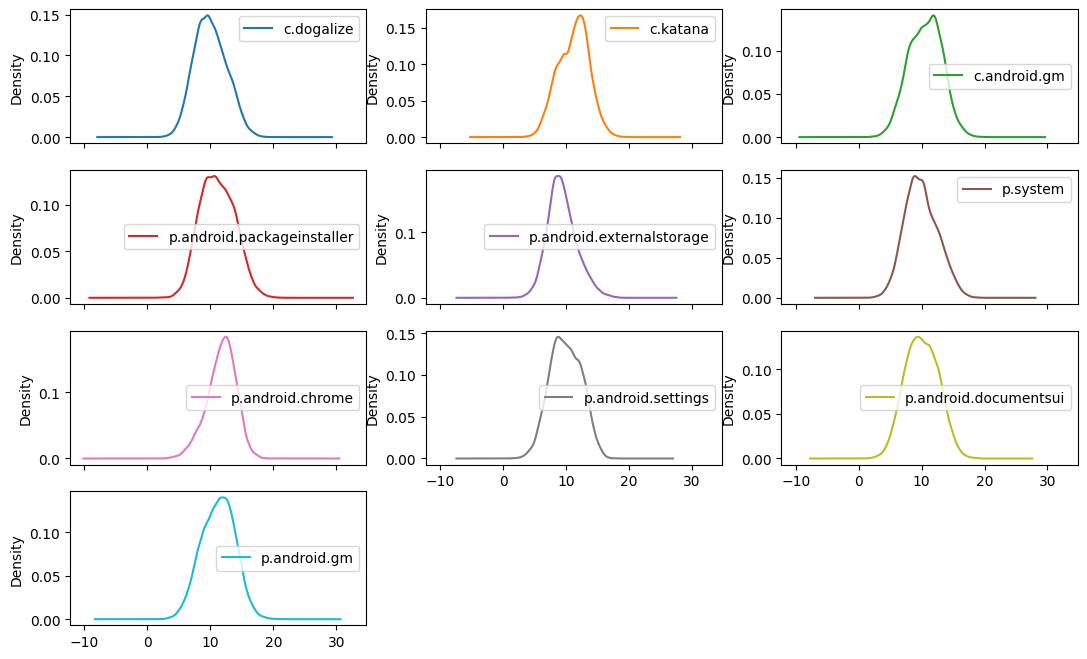

In [99]:
attributes.plot(kind='kde', subplots=True, layout=(4, 3), figsize=(13, 8))
plt.show()

### Podľa jednotlivých grafov na pohľad vyplýva že atribúty patria normálnej distribúcie.
### Aby toto naše tvrdenie bolo potvrdené, zobrazili sme atribúty cez QQ plot.

## QQ plot

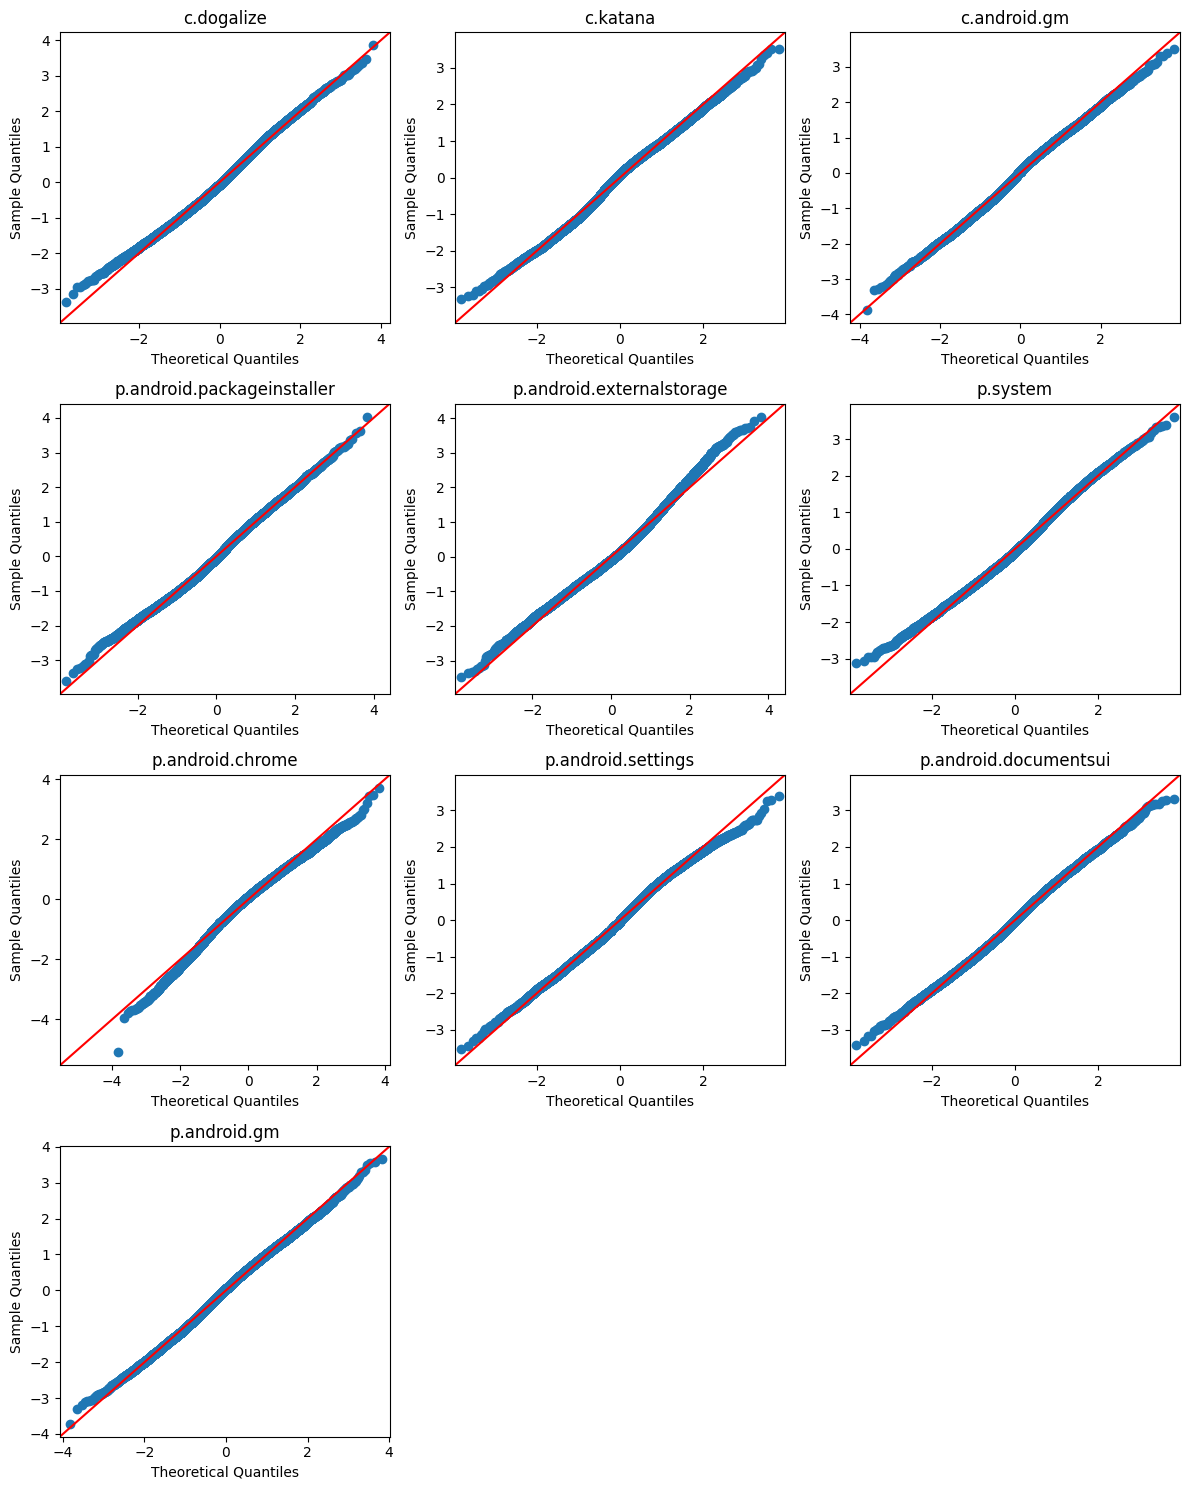

In [100]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 15))

axes = axes.flatten()

for idx, col in enumerate(attributes.columns):
    sm.qqplot(attributes[col], fit=True, line="45", ax=axes[idx])
    axes[idx].set_title(col)

for i in range(len(attributes.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Atribúty podľa QQ plot-u patria do normálnej distribúcie. Problém však vyvolávajú outlier-y, ktoré však neskôr odstránime.
### Vykonali sme ešte jeden test na normálnu distribúciu, a to Shapiro-Wilk test na normalitu.

In [101]:
for i in attributes.columns:
    pvalue=stats.shapiro(attributes[i]).pvalue
    print(f"{i:<26} = {pvalue:.6f}")

c.dogalize                 = 0.000000
c.katana                   = 0.000000
c.android.gm               = 0.000000
p.android.packageinstaller = 0.000000
p.android.externalstorage  = 0.000000
p.system                   = 0.000000
p.android.chrome           = 0.000000
p.android.settings         = 0.000000
p.android.documentsui      = 0.000000
p.android.gm               = 0.000000


c:\Users\matus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14983.
  res = hypotest_fun_out(*samples, **kwds)


### Na základe Shapiro-Wilk testu sa naše pôvodné tvrdenie, usúdené na základe grafov, vyvrátilo, pretože `p < 0.05`. Atribúty teda nepatria do normálnej distribúcie. Domnievame sa, že výskyt outlier-ov môže hrať v tomto rolu.

## C) Párová analýza dát
- Heat map MERGENUTE - len Conn a Proc RAZ!

### Rozhodli sme sa pre porovnanie jednotlivých atribútov prostredníctvom Heat mapy.

In [102]:
# con.plot(kind="scatter", x="Chrome", y="Malware")
# plt.show()

In [103]:
# sns.scatterplot(data=con, x='ID', y='Chrome', hue='DateTime')
# plt.show()

### Heat mapa pre DF Connections.

<Axes: >

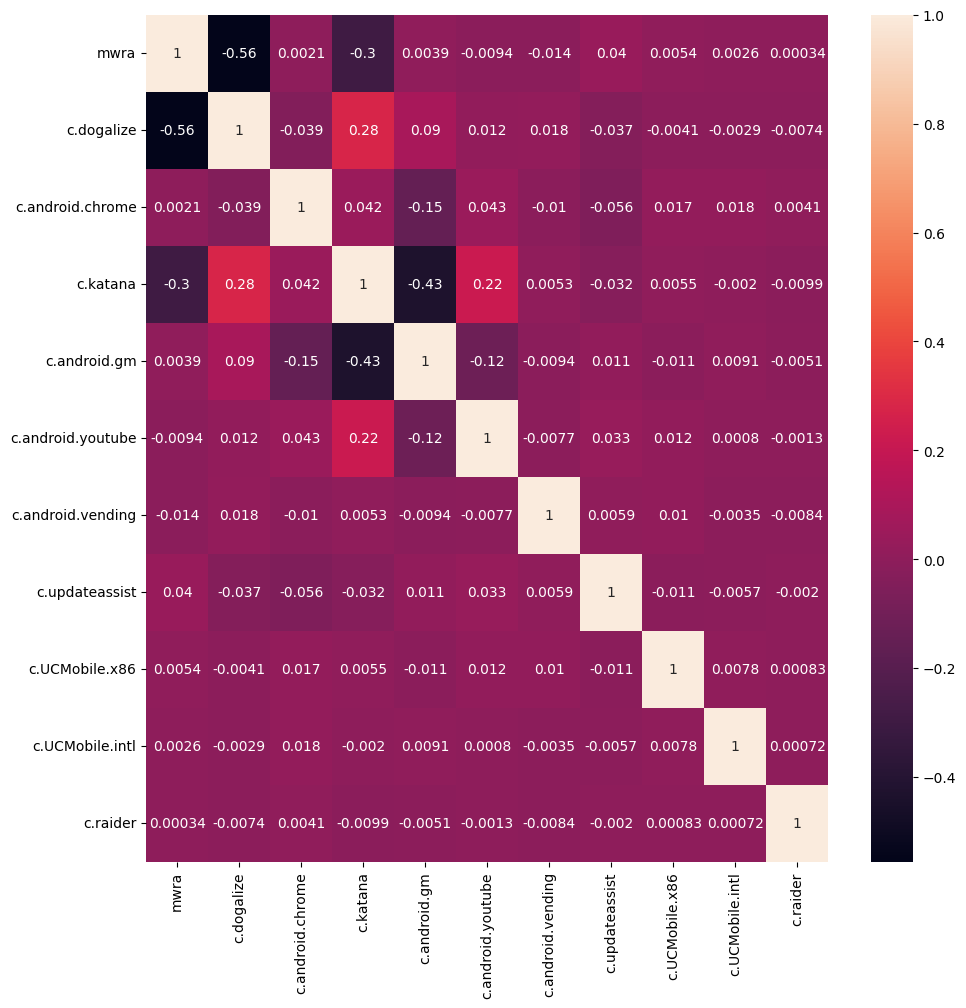

In [104]:
con2=con[[#'ts', 'imei', 
        'mwra', 
        'c.dogalize', 'c.android.chrome', 'c.katana',
       'c.android.gm', 'c.android.youtube', 'c.android.vending',
       'c.updateassist', 'c.UCMobile.x86', 'c.UCMobile.intl', 'c.raider']].copy()


con_corr2=con2.corr()

fig, ax = plt.subplots(figsize=(11,11))

sns.heatmap(con_corr2, annot=True)

### Z vykreslenej Heat mapy vidíme, že existujú korelácie medzi viacerými atribútmi. Najvýraznejšie korelácie sú medzi:
mwra - c.dogalize,
c.android.gm - c.katana
mwra - c.katana


### Heat mapa pre DF Processes.

<Axes: >

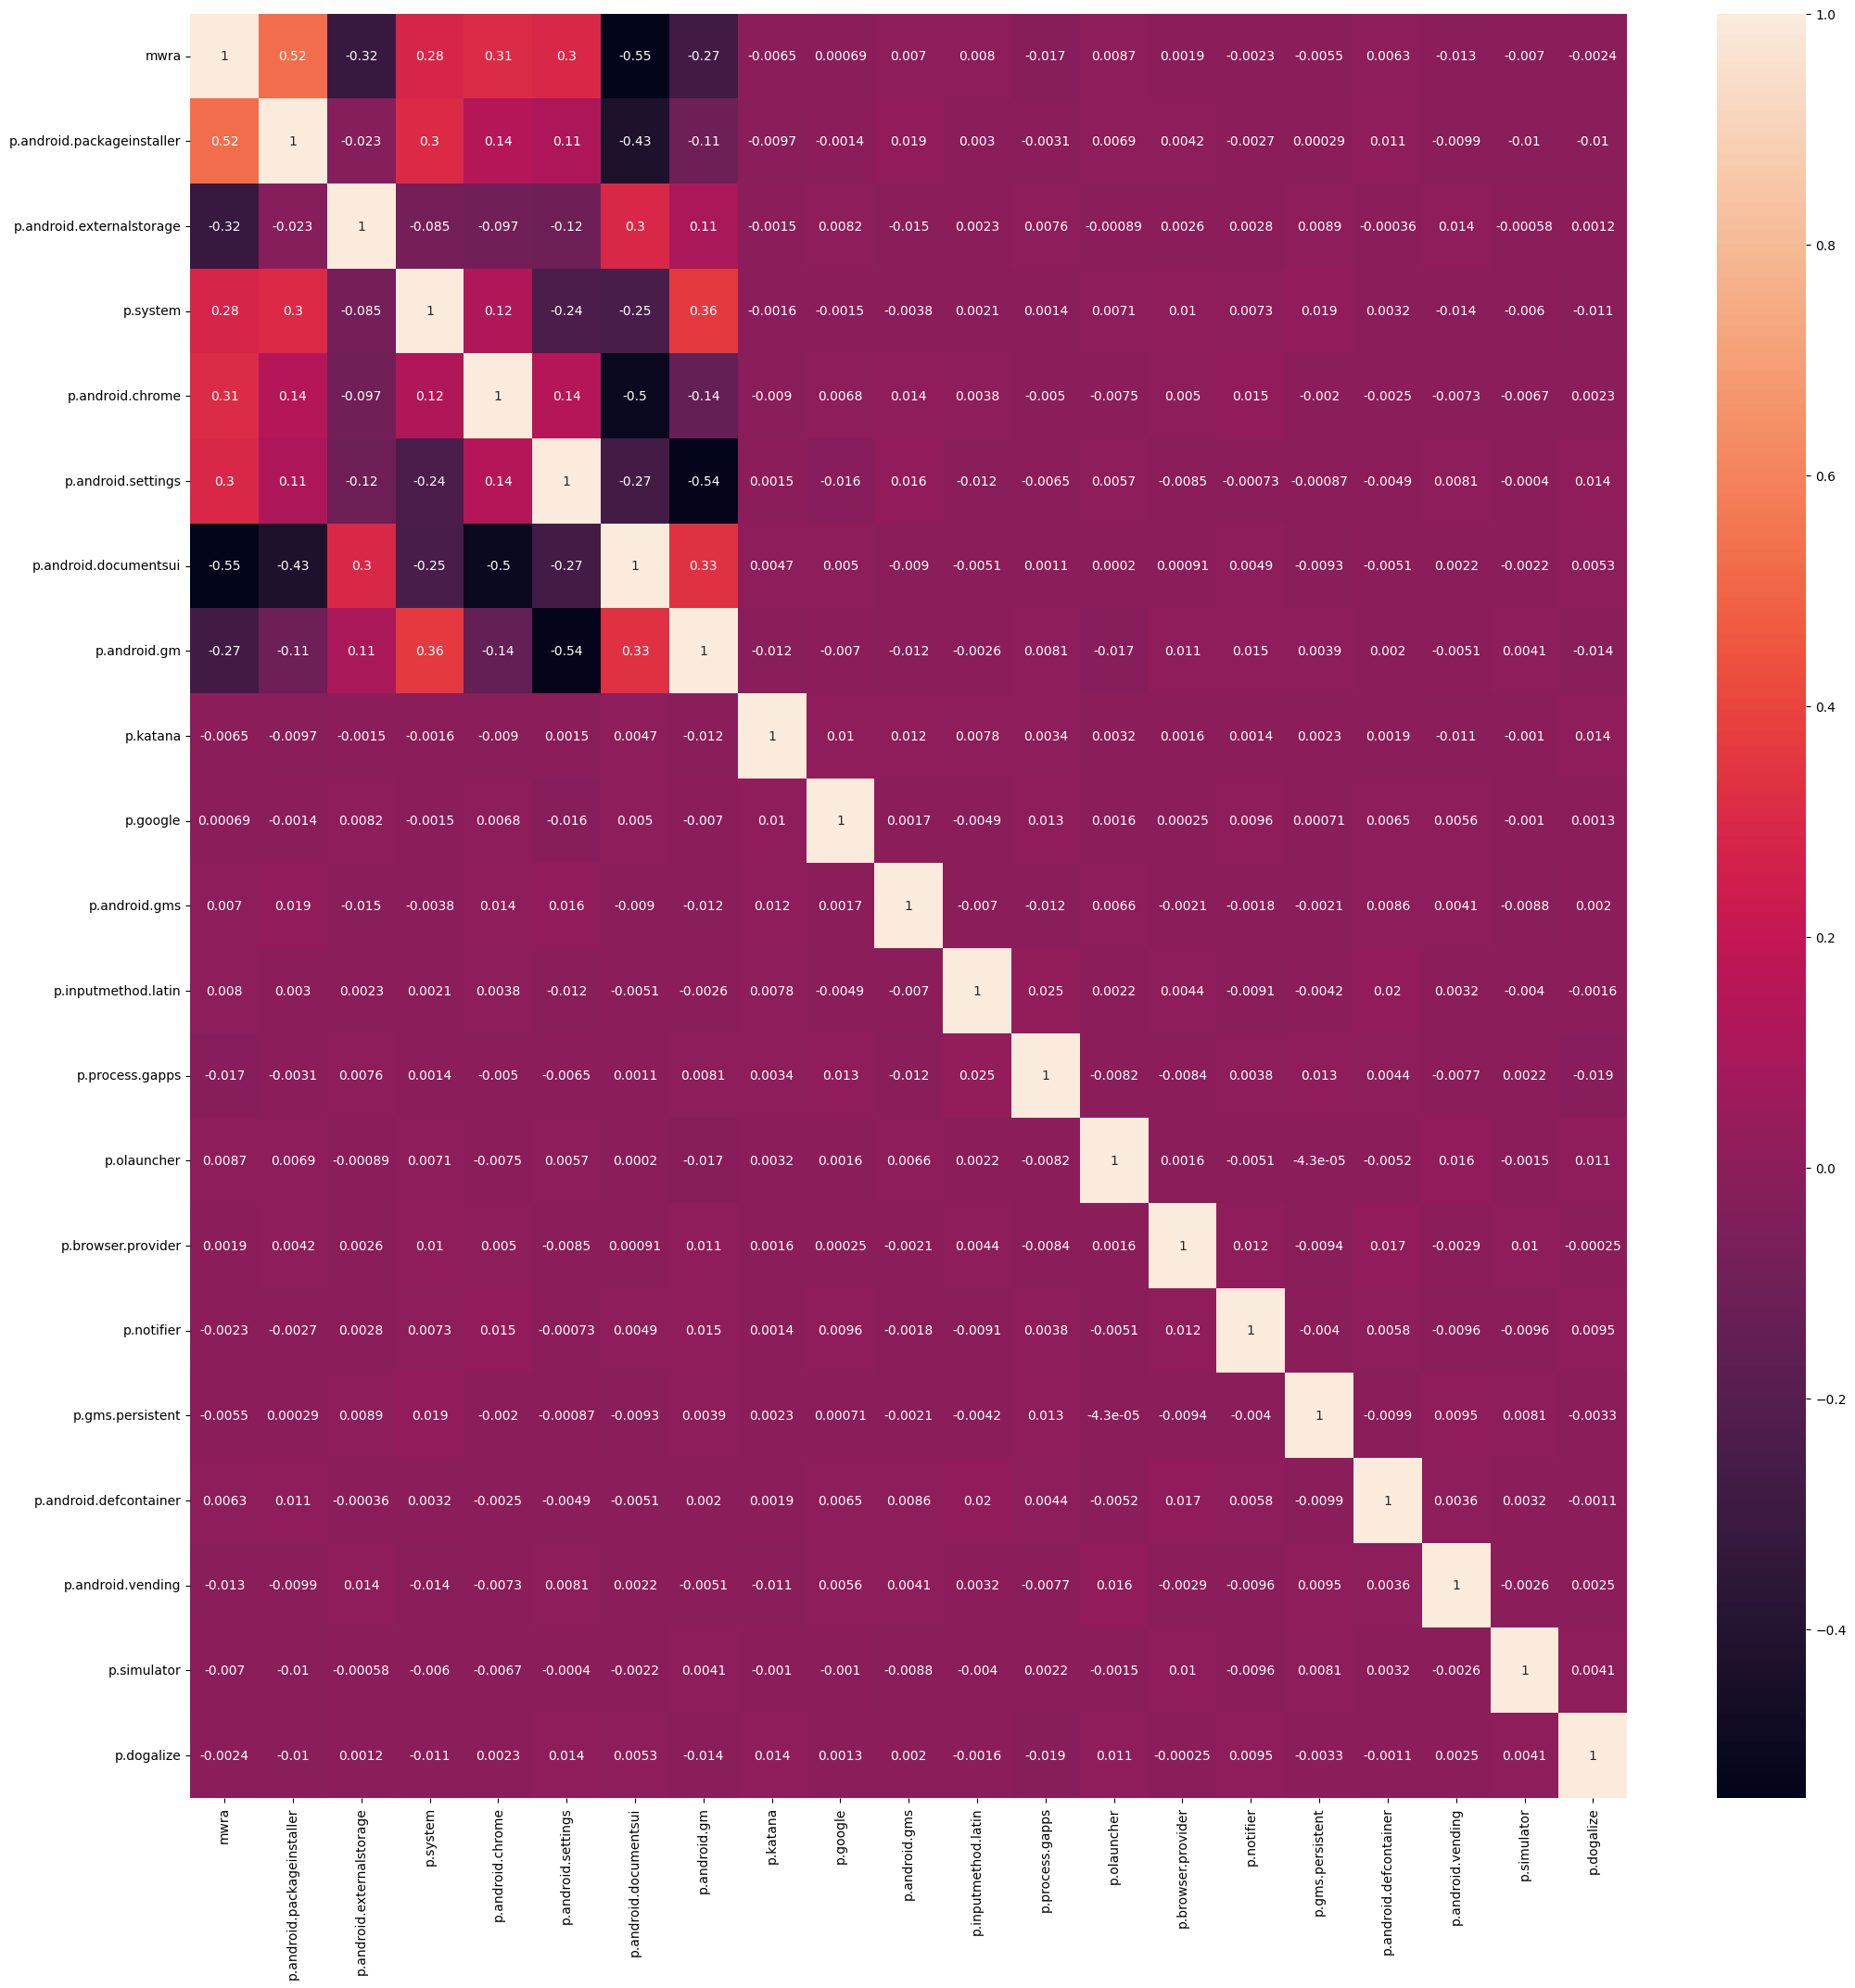

In [105]:
proc2 = proc[[#'ts', 'imei', 
        'mwra', 
        'p.android.packageinstaller',
       'p.android.externalstorage', 'p.system', 'p.android.chrome',
       'p.android.settings', 'p.android.documentsui', 'p.android.gm',
       'p.katana', 'p.google', 'p.android.gms', 'p.inputmethod.latin',
       'p.process.gapps', 'p.olauncher', 'p.browser.provider', 'p.notifier',
       'p.gms.persistent', 'p.android.defcontainer', 'p.android.vending',
       'p.simulator', 'p.dogalize']].copy()



proc_corr1=proc2.corr()

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(proc_corr1, annot=True)

### Z tejto Heat mapy vidíme viacero silnejších korelácií ako napr.
- mwra - p.android.documnetsui
- mwra - p.android.packageinstaller
- p.android.game - p.adroid.settings


### Pre porovnanie závislostí atribútov z rôznych DF (Connections, Processes) sme DF spojili na základe rovnosti: timestamp, imei a mwra atribútov.

In [106]:
con_proc = pd.merge(con, proc, on=['ts', 'imei', 'mwra'])
con_proc.shape
#pd.set_option('display.max_columns', None) 
# con_proc.head()

(14983, 33)

### Heat map pre merge DF: Connections a Processes.

<Axes: >

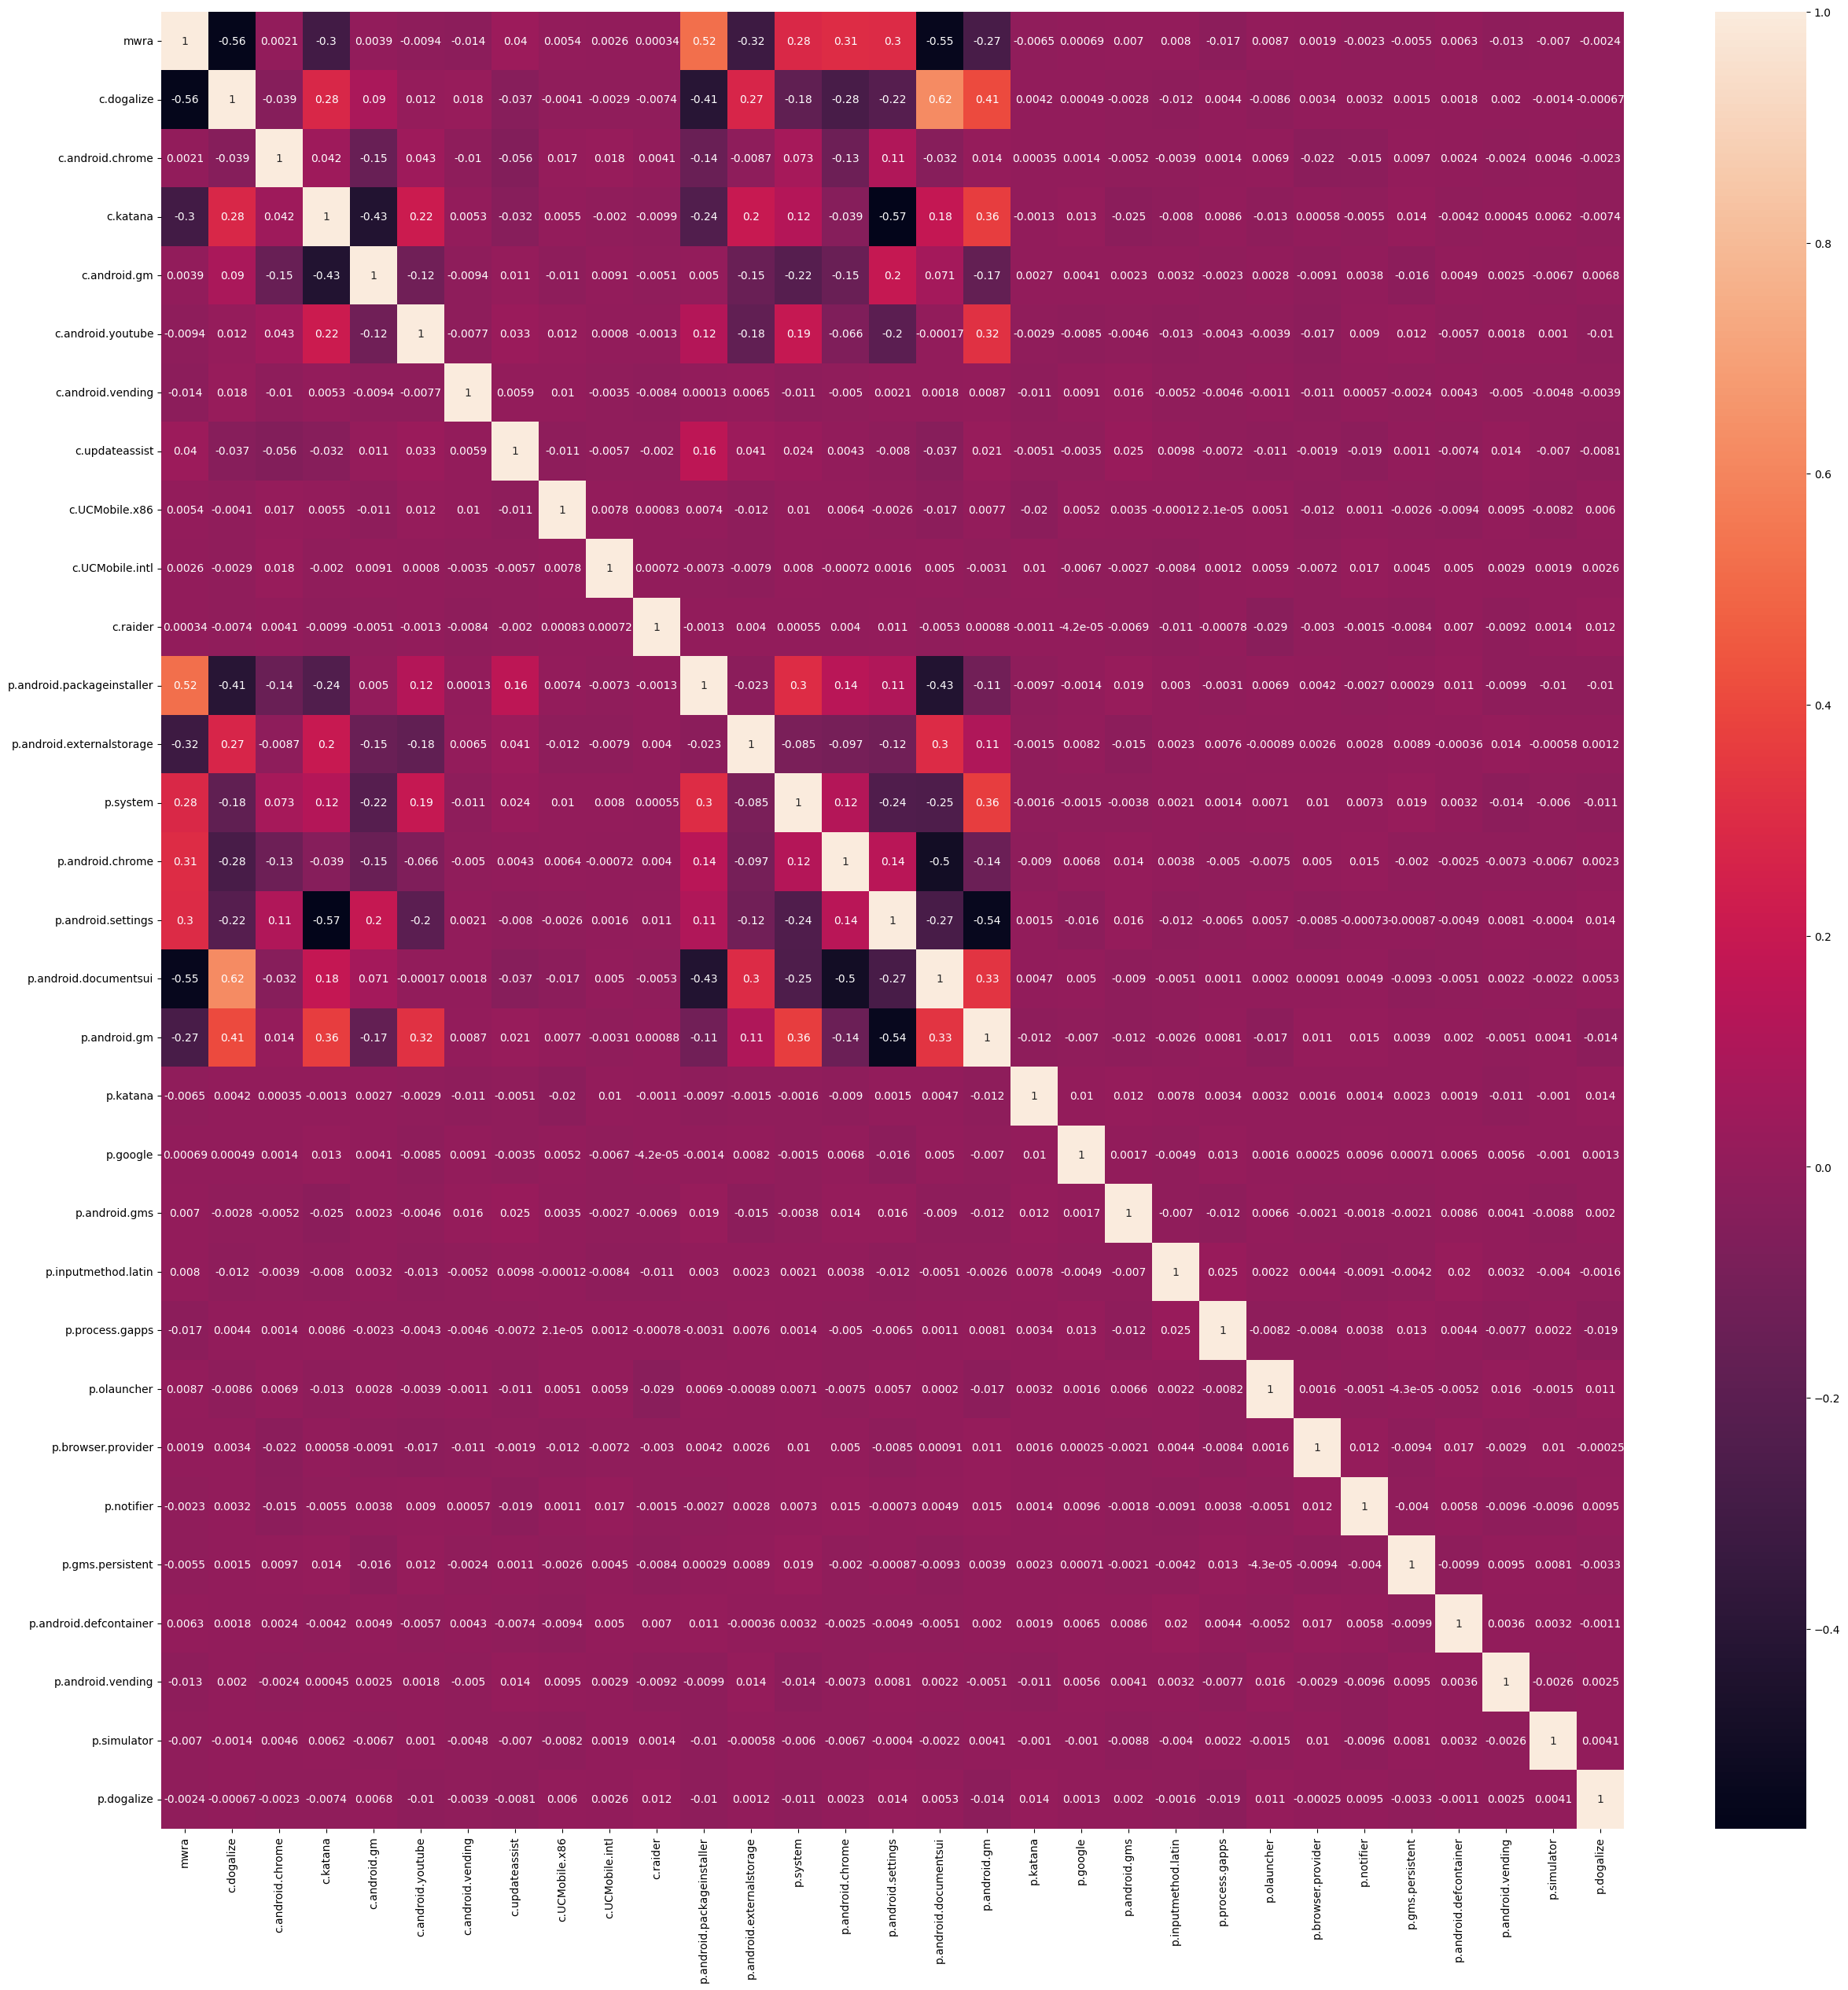

In [107]:
con_proc_corr=con_proc.drop(columns=['ts', 'imei']).corr()

fig, ax = plt.subplots(figsize=(30,30))

sns.heatmap(con_proc_corr, annot=True)

### Na základe Heat mapy sme zistili značné korelácie medzi atribútmi:
- c.dogalize - p.android.documentsui
- c.katana - p.android.settings
- c.dogalize - p.adroid.gm

## D) Párová analýza dát - predikovaná premenná
- ABS ku histogramu

### Koreláciu atribútov s predikovanou premennou sme vykonali v predchádzajúcom kroku.
### Teraz zobrazíme na histograme závislosti všetkých atribútov z Connections a Processes s predikovanou premennou (mwra).

In [108]:
mwra_corr = con_proc_corr['mwra'].drop('mwra').sort_values(ascending=False)

### Histogram korelácií.

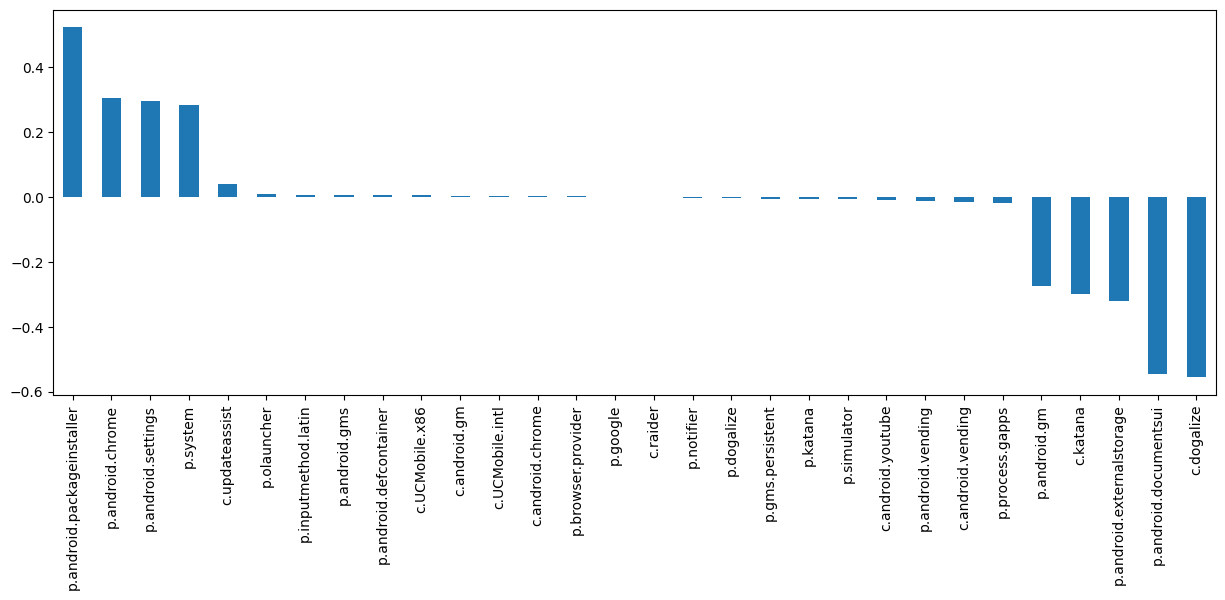

In [109]:
mwra_corr.plot(kind='bar', figsize=(15, 5))
plt.show()

### Najsilnejšie korelácie sú:

[]

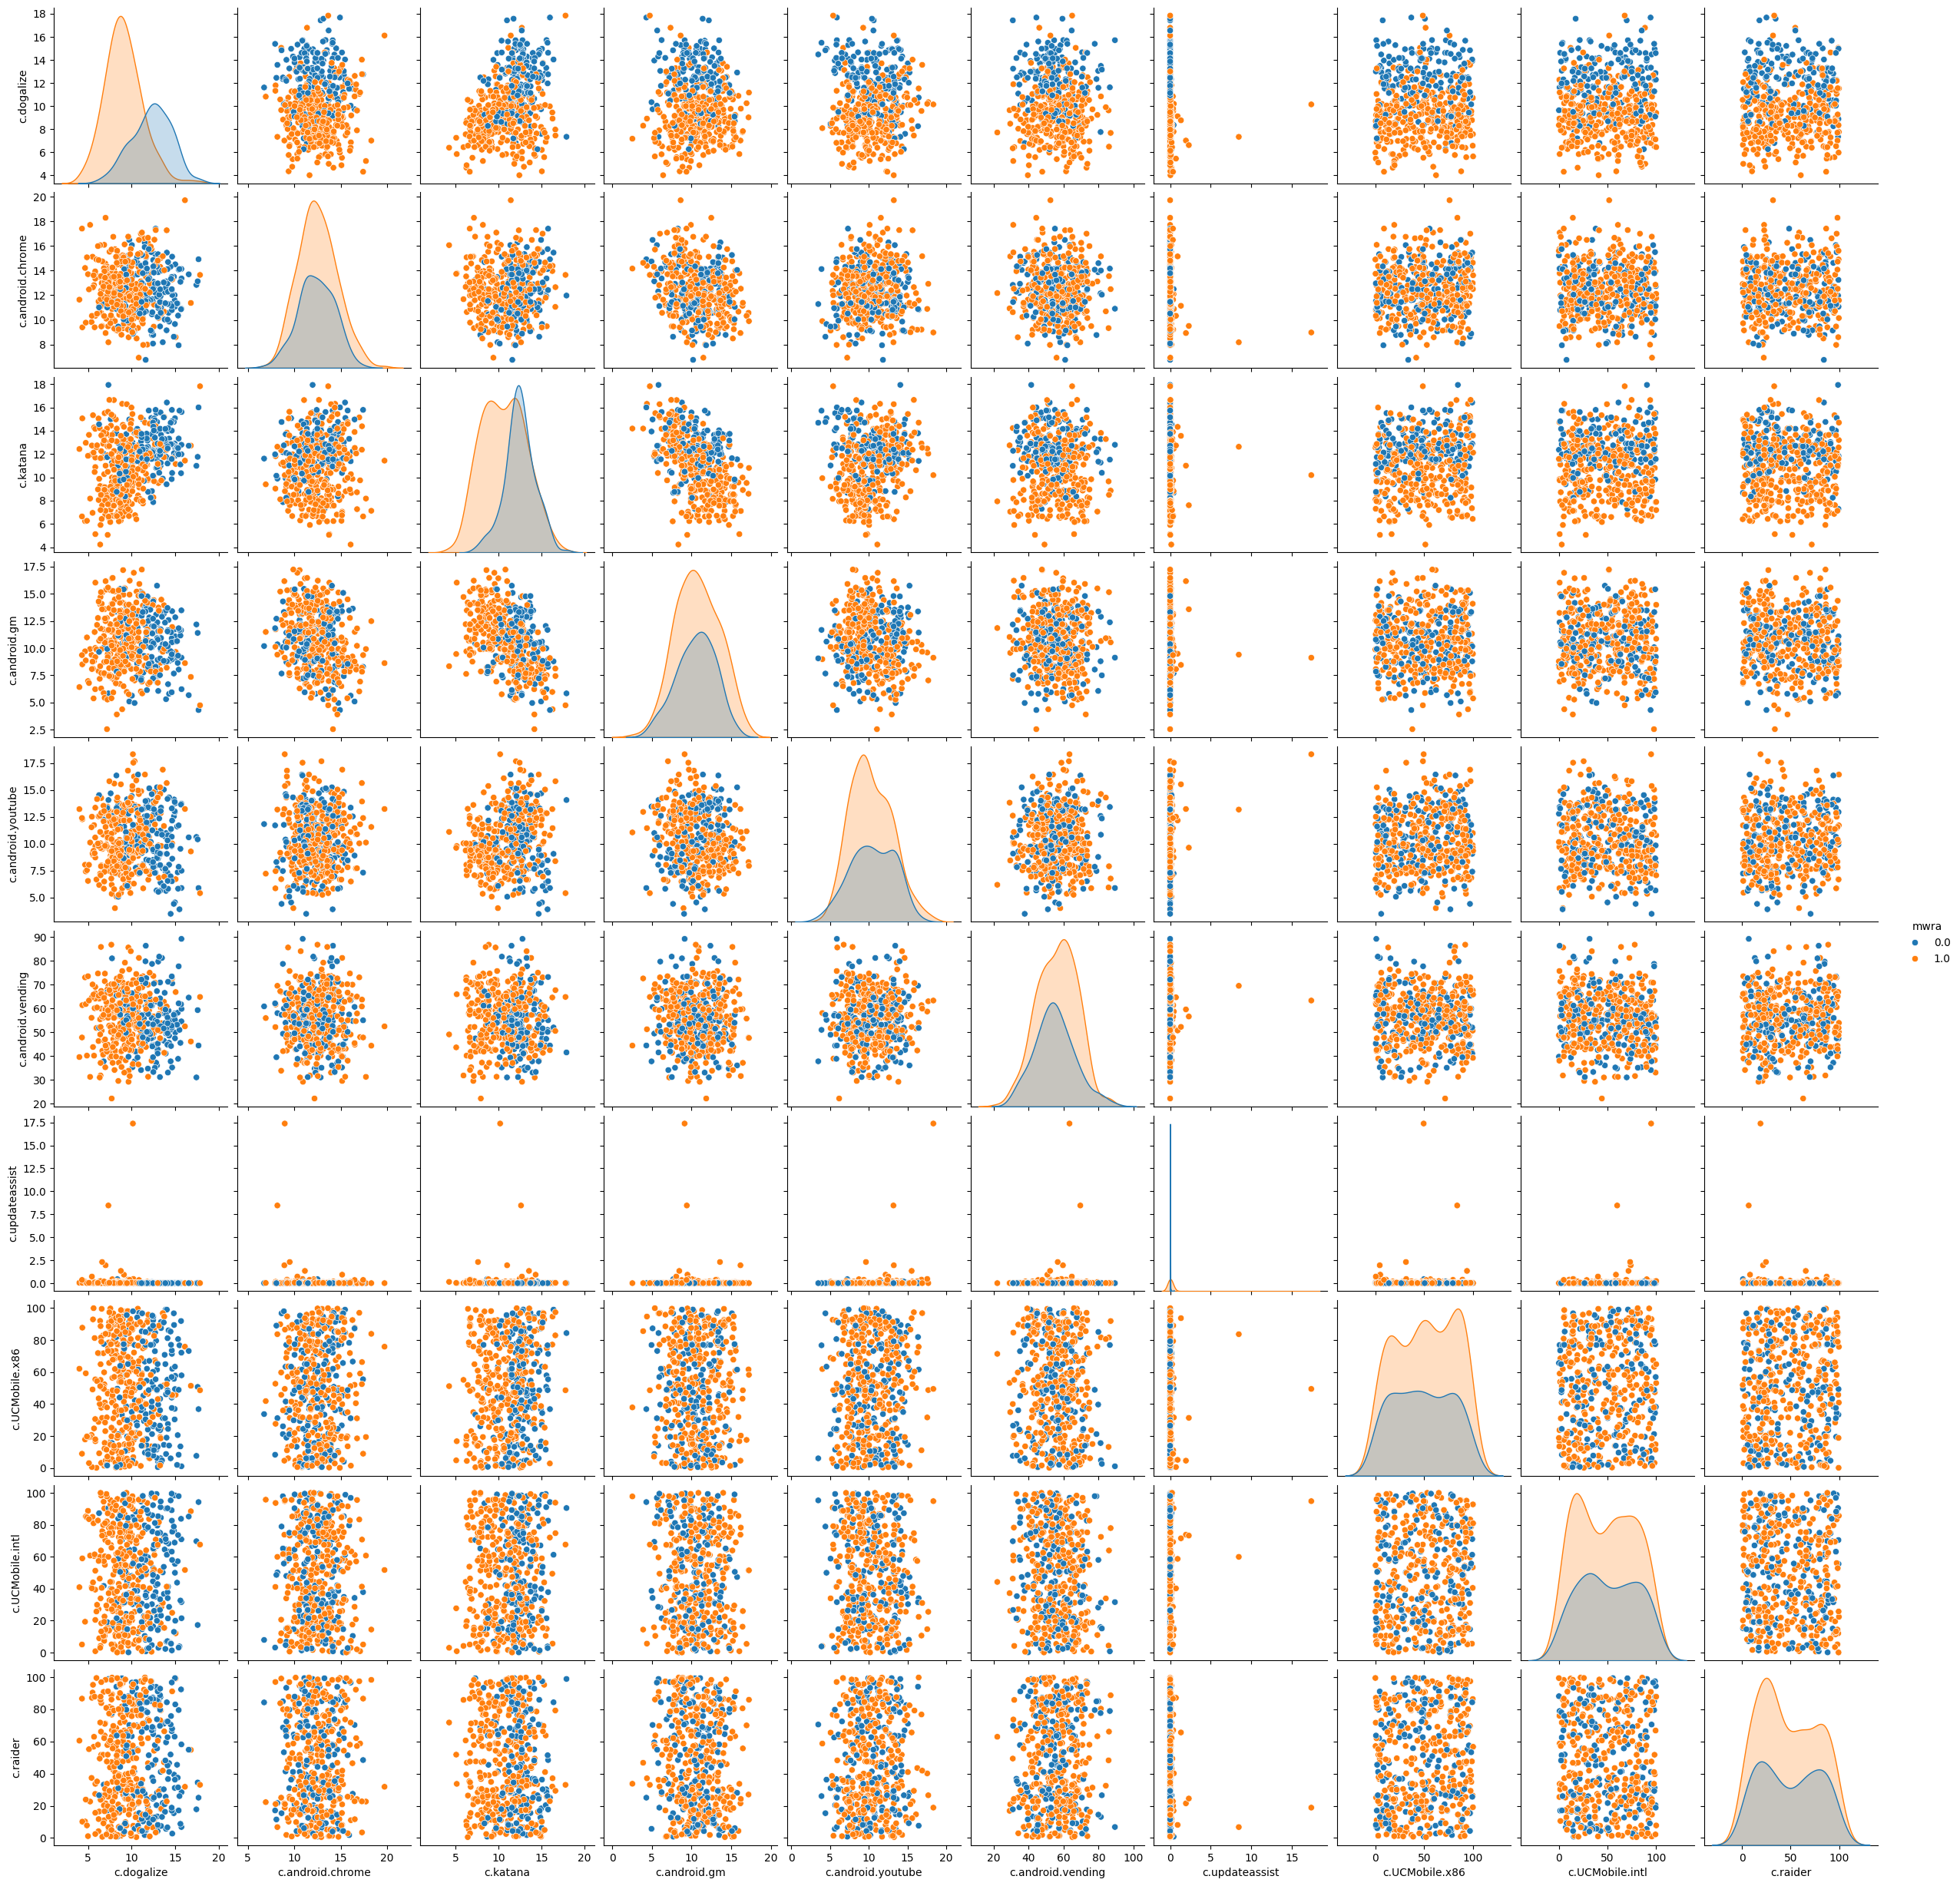

In [110]:
sns.pairplot(con2.head(500), hue='mwra')
plt.plot()

## E) Dokumentujte Vaše prvotné zamyslenie k riešeniu zadania projektu

### Závislosť atribútov sme zobrazli cez Heat mapu v časti C) aj pre DF Connections, aj Processes. Takisto sme vypísali ich najsilnejšie korelácie.
### Závisloť predikovannej premennej sme zobrazili cez histogram v časti D).
### Kombinovanie záznamov je bolo potrebné na zistenie korelácií atribútov z rôznych DF.
### Najsilnejšia korelácia je práve medzi atribútmi z rôznych DF.

# 1.2 Identifikácia problémov, integrácia a čistenie dát

## A) Nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce, vychýlené hodnoty

### Názvy stĺpcov jednotlivých DataFrame-ov

In [111]:
con.columns

Index(['ts', 'imei', 'mwra', 'c.dogalize', 'c.android.chrome', 'c.katana',
       'c.android.gm', 'c.android.youtube', 'c.android.vending',
       'c.updateassist', 'c.UCMobile.x86', 'c.UCMobile.intl', 'c.raider'],
      dtype='object')

In [112]:
proc.columns

Index(['ts', 'imei', 'mwra', 'p.android.packageinstaller',
       'p.android.externalstorage', 'p.system', 'p.android.chrome',
       'p.android.settings', 'p.android.documentsui', 'p.android.gm',
       'p.katana', 'p.google', 'p.android.gms', 'p.inputmethod.latin',
       'p.process.gapps', 'p.olauncher', 'p.browser.provider', 'p.notifier',
       'p.gms.persistent', 'p.android.defcontainer', 'p.android.vending',
       'p.simulator', 'p.dogalize'],
      dtype='object')

In [113]:
dev.columns

Index(['latitude', 'longitude', 'store_name', 'code', 'location', 'imei'], dtype='object')

In [114]:
prof.columns

Index(['job', 'current_location', 'imei', 'user_id', 'address', 'ssn',
       'company', 'birthdate', 'registration', 'mail', 'username', 'name'],
      dtype='object')

### Premenovanie stĺpcov. Osobná preferencia.

In [115]:
con = con.rename(columns={  'ts':'DateTime',
                            'imei':'ID',
                            'mwra':'Malware',
                            'c.dogalize':'Dogalize',
                            'c.android.chrome':'Chrome',
                            'c.katana':'Katana',
                            'c.android.gm':'Gm',
                            'c.android.youtube':'Youtube',
                            'c.android.vending':'Vending',
                            'c.updateassist':'Update_Assist',
                            'c.UCMobile.x86':'UCMobile_x86',
                            'c.UCMobile.intl':'UCMobile_intl',
                            'c.raider':'Raider'})

proc = proc.rename(columns={'ts':'DateTime',
                            'imei':'ID',
                            'mwra':'Malware',
                            'p.android.packageinstaller':'Package_Installer',
                            'p.android.externalstorage':'External_Storage',
                            'p.system':'System',
                            'p.android.chrome':'Chrome',
                            'p.android.settings':'Settings',
                            'p.android.documentsui':'Document_Sui',
                            'p.android.gm':'Gm',
                            'p.katana':'Katana',
                            'p.google':'Google',
                            'p.android.gms':'Gms',
                            'p.inputmethod.latin':'InputMethod_Latin',
                            'p.process.gapps':'Process_Gapps',
                            'p.olauncher':'OLauncher',
                            'p.browser.provider':'Browser_Provider',
                            'p.notifier':'Notifier',
                            'p.gms.persistent':'Gms_Persistent',
                            'p.android.defcontainer':'Def_Container',
                            'p.android.vending':'Vending',
                            'p.simulator':'Simulator',
                            'p.dogalize':'Dogalize'})

dev = dev.rename(columns={  'latitude':'Width',
                            'longitude':'Length',
                            'store_name':'City',
                            'code':'Country',
                            'location':'Location',
                            'imei':'ID'})

prof = prof.rename(columns={'job':'Job',
                            'current_location':'Coordinates',
                            'imei':'ID',
                            'user_id':'UserID',
                            'address':'Adress',
                            'ssn':'SSN',
                            'company':'Company',
                            'birthdate':'Birthdate',
                            'registration':'Registration',
                            'mail':'Email',
                            'username':'Username',
                            'name':'Name'})

### Preusporiadanie stĺpcov. Osobná preferencia.

In [116]:
con = con[[     'ID', 'Malware', 'DateTime', 'Chrome',
                'Youtube', 'Dogalize', 'Katana', 'Raider', 'Gm',
                'Vending', 'Update_Assist', 'UCMobile_x86', 'UCMobile_intl']]

proc = proc[[   'ID', 'Malware', 'DateTime', 'Chrome',
                'Google', 'Dogalize', 'Katana', 'Gm',
                'Vending', 'System', 'Settings', 'Simulator',
                'Notifier', 'Gms', 'Gms_Persistent', 'Document_Sui',
                'Package_Installer', 'External_Storage', 'InputMethod_Latin',
                'Process_Gapps', 'OLauncher', 'Browser_Provider',   'Def_Container']]

dev = dev[['ID', 'Country', 'City', 'Location', 'Width', 'Length']]

prof = prof[[   'ID', 'UserID', 'Username', 'Name', 'Email', 'Birthdate',
                'Job', 'Adress', 'SSN', 'Company',  
                'Registration', 'Coordinates']]

### Zmena stĺpca na správny/zodpovedajúci dátovy typ.

#### Funkcia konkrétne pre `prof['Registration']` kvôli viacerým rôznym dátumovým formátom.

In [117]:
def convert_mixed_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        try:
            # (YYYY-MM-DD)
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except ValueError:
            try:
                # (MM/DD/YYYY, HH:MM:SS)
                return pd.to_datetime(date_str, format='%m/%d/%Y, %H:%M:%S')
            except ValueError:
                try:
                    # (07 Oct 2023)
                    return pd.to_datetime(date_str, format='%d %b %Y')
                except ValueError:
                    return pd.NaT

In [118]:
con['DateTime'] = pd.to_datetime(con['DateTime'])
con['Malware'] = con['Malware'].astype(int)

proc['DateTime'] = pd.to_datetime(proc['DateTime'])
proc['Malware'] = proc['Malware'].astype(int)

##* prof['Coordinates']
prof['Birthdate'] =  pd.to_datetime(prof['Birthdate'])
prof['Registration'] = prof['Registration'].apply(convert_mixed_date)

### Duplikátne záznamy v jednotlivých DataFrame-och.

In [119]:
con.duplicated().sum()

np.int64(0)

In [120]:
proc.duplicated().sum()

np.int64(0)

In [121]:
dev.duplicated().sum()

np.int64(6)

In [122]:
prof.duplicated().sum()

np.int64(0)

### Proces vymazania duplikátnych záznamov.

#### Počet záznamov pred vymazaním.

In [123]:
print(
    f"BEFORE:\n\nConnections -> {con.shape[0]} \nProcesses -> {proc.shape[0]} \nDevices -> {dev.shape[0]} \nProfiles -> {prof.shape[0]}"
)

BEFORE:

Connections -> 14983 
Processes -> 14983 
Devices -> 2983 
Profiles -> 2517


#### Vymazanie duplikátnych záznamov. UZ UROBENÉ pre CONNECTIONS a PROCESSES.

In [124]:
# con = con.loc[~con.duplicated()].reset_index(drop=True).copy()
# proc = proc.loc[~proc.duplicated()].reset_index(drop=True).copy()
dev = dev.loc[~dev.duplicated()].reset_index(drop=True).copy()

#### Počet záznamov po vymazaní.

In [125]:
print(
    f"AFTER:\n\nConnections -> {con.shape[0]} \nProcesses -> {proc.shape[0]} \nDevices -> {dev.shape[0]} \nProfiles -> {prof.shape[0]}"
)

AFTER:

Connections -> 14983 
Processes -> 14983 
Devices -> 2977 
Profiles -> 2517


## B) Chýbajúce hodnoty

### Zobrazenie chýbajúcich hodnôt v jednotlivých dátach.

In [126]:
con.isna().sum()

ID               0
Malware          0
DateTime         0
Chrome           0
Youtube          0
Dogalize         0
Katana           0
Raider           0
Gm               0
Vending          0
Update_Assist    0
UCMobile_x86     0
UCMobile_intl    0
dtype: int64

In [127]:
proc.isna().sum()

ID                   0
Malware              0
DateTime             0
Chrome               0
Google               0
Dogalize             0
Katana               0
Gm                   0
Vending              0
System               0
Settings             0
Simulator            0
Notifier             0
Gms                  0
Gms_Persistent       0
Document_Sui         0
Package_Installer    0
External_Storage     0
InputMethod_Latin    0
Process_Gapps        0
OLauncher            0
Browser_Provider     0
Def_Container        0
dtype: int64

In [128]:
dev.isna().sum()

ID          0
Country     1
City        0
Location    0
Width       0
Length      0
dtype: int64

In [129]:
prof.isna().sum()

ID                 0
UserID             0
Username           0
Name               0
Email              0
Birthdate       1133
Job             1762
Adress           378
SSN                0
Company            0
Registration       0
Coordinates      126
dtype: int64

In [130]:
prof.shape

(2517, 12)

In [131]:
prof[~prof['current_location'].isna() & prof['address'].isna()].shape

KeyError: 'current_location'

### Column Birthdate deleted

In [33]:
prof = prof.drop('Birthdate', axis=1)

### Column Job deleted

In [34]:
prof = prof.drop('Job', axis=1)

### Column Adress Na values -> "not included"

In [35]:
prof['Adress'] = prof['Adress'].fillna('not included')

### Columns Coordinates

### Change 1 missing information in devices

In [ ]:
dev.loc[dev['Country'].isna()]

In [37]:
dev.loc[2525, 'Country'] = 'NA'

# C

In [132]:
con.columns

Index(['ID', 'Malware', 'DateTime', 'Chrome', 'Youtube', 'Dogalize', 'Katana',
       'Raider', 'Gm', 'Vending', 'Update_Assist', 'UCMobile_x86',
       'UCMobile_intl'],
      dtype='object')

In [135]:
con['Update_Assist'].value_counts().sort_index().tail(10)
con[con['Update_Assist']>0.03].count()

ID               2318
Malware          2318
DateTime         2318
Chrome           2318
Youtube          2318
Dogalize         2318
Katana           2318
Raider           2318
Gm               2318
Vending          2318
Update_Assist    2318
UCMobile_x86     2318
UCMobile_intl    2318
dtype: int64

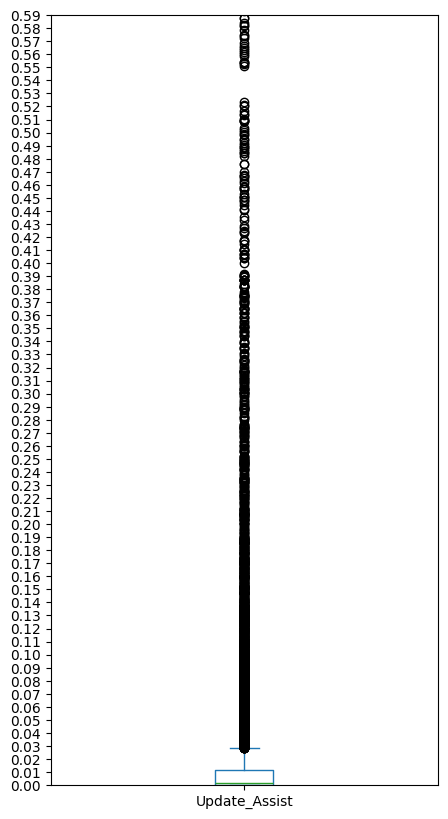

In [136]:
#con['Update_Assist'].median()
con['Update_Assist'].plot(kind='box', figsize=(5,10))
plt.ylim(0, 0.5)
plt.yticks(np.arange(0,0.6,0.01))
plt.show()

In [ ]:
# Predpokladáme, že 'con' je tvoj DataFrame
columns = ['Chrome', 'Youtube', 'Dogalize', 'Katana',
           'Raider', 'Gm', 'Vending', 'Update_Assist', 'UCMobile_x86',
           'UCMobile_intl']

# Nastavenie veľkosti grafu
plt.figure(figsize=(10, 5 * len(columns)))  # Výška sa zvyšuje v závislosti od počtu stĺpcov

# Vytvorenie boxplotu pre každý stĺpec
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)  # Nastavenie pozície podgrafu
    con[col].plot(kind='box')
    plt.title(f'Boxplot pre {col}')  # Pridanie nadpisu
    plt.ylabel('Hodnoty')  # Popis osi Y

# Zlepšenie rozloženia
plt.tight_layout()
plt.show()

# 1.3 Formulácia a štatistické overenie hypotéz o dátach

## A

## B

# EXTRA

In [42]:
con.to_csv('dataset82_edited/Connections.csv', index=False)
proc.to_csv('dataset82_edited/Processes.csv', index=False)
dev.to_csv('dataset82_edited/Devices.csv', index=False)
prof.to_csv('dataset82_edited/Profiles.csv', index=False)